# Reconaissance des régions actives et structures
Reconnaissance automatique des régions actives et structures sur les images des lunettes

Ressources: https://www.computing-conf.org/wp-content/uploads/2022/11/1_AC2022_F_044.pdf

In [1]:
import bz2
from astropy.io import fits

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [12]:
decompressed_file = bz2.BZ2File('data/L2/imoa_03933_l2_20240228_12402419_emi1.fts.bz2')
with fits.open(decompressed_file) as hdul:
        data = hdul[0].data

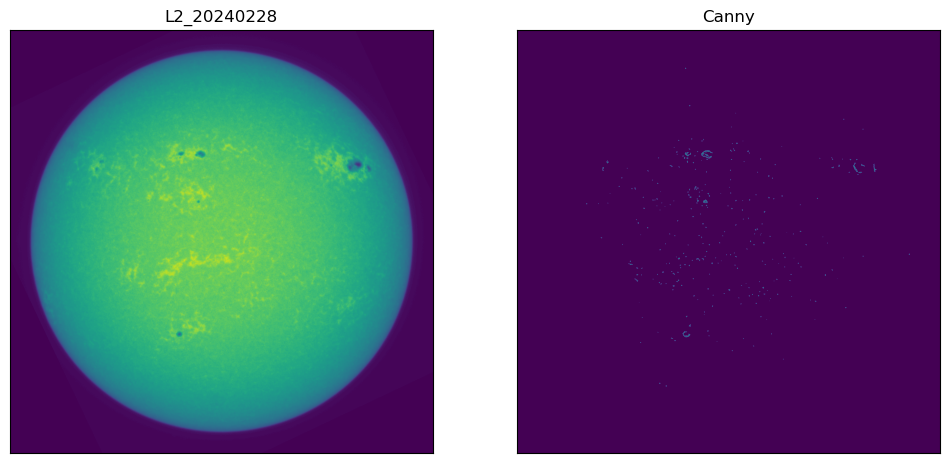

In [32]:
from numpy import uint8

img = cv.convertScaleAbs(data, alpha=(255.0/65535.0)).astype(uint8)

img_canny = cv.Canny(img,20,40)

plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img)
plt.title('L2_20240228'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(img_canny)
plt.title('Canny'), plt.xticks([]), plt.yticks([]);

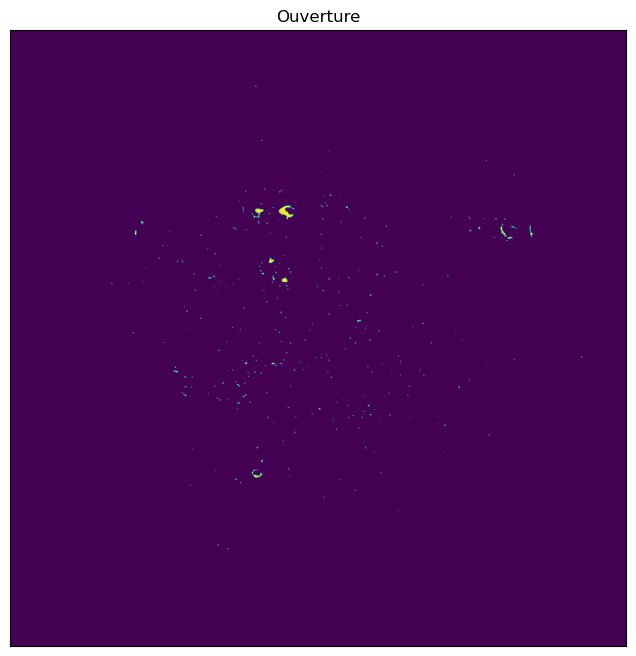

In [48]:
kernel = cv.getStructuringElement(cv.MORPH_RECT,(10,10))
opening = cv.morphologyEx(img_canny, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(8,8))
plt.imshow(opening)
plt.title('Ouverture'), plt.xticks([]), plt.yticks([]);